# Solar Energy Production
In this notebook we will analyse the solar energy production data.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

print('Pandas version:', pd.__version__) # 2.2.3
print('Numpy version:', np.__version__) # 1.26.4
print('Seaborn version:', sns.__version__) # 0.13.2

Pandas version: 2.2.3
Numpy version: 1.26.4
Seaborn version: 0.13.2


## Load the dataset
We will start with loading the dataset for energy production. We will load the entire production dataset and then filter it to get the data we will need in this notebook.

In [87]:
df = pd.read_csv('../data/ProductionData/cleaned_energie_opwek.csv')
df = df[df['type'] == 'Solar'].reset_index(drop=True)
df.head()

,datetime,point,type,granularity,timezone,activity,classification,capacity,volume,percentage,emission,emissionfactor
0,2020-12-31 23:00:00,Nederland,Solar,Hour,UTC,Providing,Current,0,0,0.0,0,0.0
1,2021-01-01 00:00:00,Nederland,Solar,Hour,UTC,Providing,Current,0,0,0.0,0,0.0
2,2021-01-01 01:00:00,Nederland,Solar,Hour,UTC,Providing,Current,0,0,0.0,0,0.0
3,2021-01-01 02:00:00,Nederland,Solar,Hour,UTC,Providing,Current,0,0,0.0,0,0.0
4,2021-01-01 03:00:00,Nederland,Solar,Hour,UTC,Providing,Current,0,0,0.0,0,0.0


## Data Analysis

In [88]:
df['date'] = pd.to_datetime(df['datetime']).dt.date
df['time'] = pd.to_datetime(df['datetime']).dt.time

df = df.drop(columns=['datetime'])

df = df[['date', 'time'] + [col for col in df.columns if col not in ['date', 'time']]] 

df.head()

,date,time,point,type,granularity,timezone,activity,classification,capacity,volume,percentage,emission,emissionfactor
0,2020-12-31,23:00:00,Nederland,Solar,Hour,UTC,Providing,Current,0,0,0.0,0,0.0
1,2021-01-01,00:00:00,Nederland,Solar,Hour,UTC,Providing,Current,0,0,0.0,0,0.0
2,2021-01-01,01:00:00,Nederland,Solar,Hour,UTC,Providing,Current,0,0,0.0,0,0.0
3,2021-01-01,02:00:00,Nederland,Solar,Hour,UTC,Providing,Current,0,0,0.0,0,0.0
4,2021-01-01,03:00:00,Nederland,Solar,Hour,UTC,Providing,Current,0,0,0.0,0,0.0


By loading the dataframe we can see the very first row contains data from the year 2020. Since we are only focussing on 2021-2023 we don't need this row and we will drop it.

In [89]:
df['date'] = pd.to_datetime(df['date'])

In [90]:
df = df[(df['date'].dt.year >= 2021) & (df['date'].dt.year <= 2023)]
df.head()

,date,time,point,type,granularity,timezone,activity,classification,capacity,volume,percentage,emission,emissionfactor
1,2021-01-01,00:00:00,Nederland,Solar,Hour,UTC,Providing,Current,0,0,0.0,0,0.0
2,2021-01-01,01:00:00,Nederland,Solar,Hour,UTC,Providing,Current,0,0,0.0,0,0.0
3,2021-01-01,02:00:00,Nederland,Solar,Hour,UTC,Providing,Current,0,0,0.0,0,0.0
4,2021-01-01,03:00:00,Nederland,Solar,Hour,UTC,Providing,Current,0,0,0.0,0,0.0
5,2021-01-01,04:00:00,Nederland,Solar,Hour,UTC,Providing,Current,0,0,0.0,0,0.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26279 entries, 1 to 26279
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            26279 non-null  datetime64[ns]
 1   time            26279 non-null  object        
 2   point           26279 non-null  object        
 3   type            26279 non-null  object        
 4   granularity     26279 non-null  object        
 5   timezone        26279 non-null  object        
 6   activity        26279 non-null  object        
 7   classification  26279 non-null  object        
 8   capacity        26279 non-null  int64         
 9   volume          26279 non-null  int64         
 10  percentage      26279 non-null  float64       
 11  emission        26279 non-null  int64         
 12  emissionfactor  26279 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 2.8+ MB


We can see the dataset does not contain any null values.

In [92]:
df_production_daily = df.groupby('date', as_index=False).agg({
    'capacity': 'sum',
    'volume': 'sum',
    'percentage': 'mean',
    'emission': 'sum',
    'emissionfactor': 'mean'
})

df_production_daily.head()

,date,capacity,volume,percentage,emission,emissionfactor
0,2021-01-01,7969775,7969775,0.035783,0,0.0
1,2021-01-02,5772534,5772534,0.025894,0,0.0
2,2021-01-03,4362255,4362255,0.019550,0,0.0
3,2021-01-04,3171814,3171814,0.014202,0,0.0
4,2021-01-05,2622513,2622513,0.011732,0,0.0


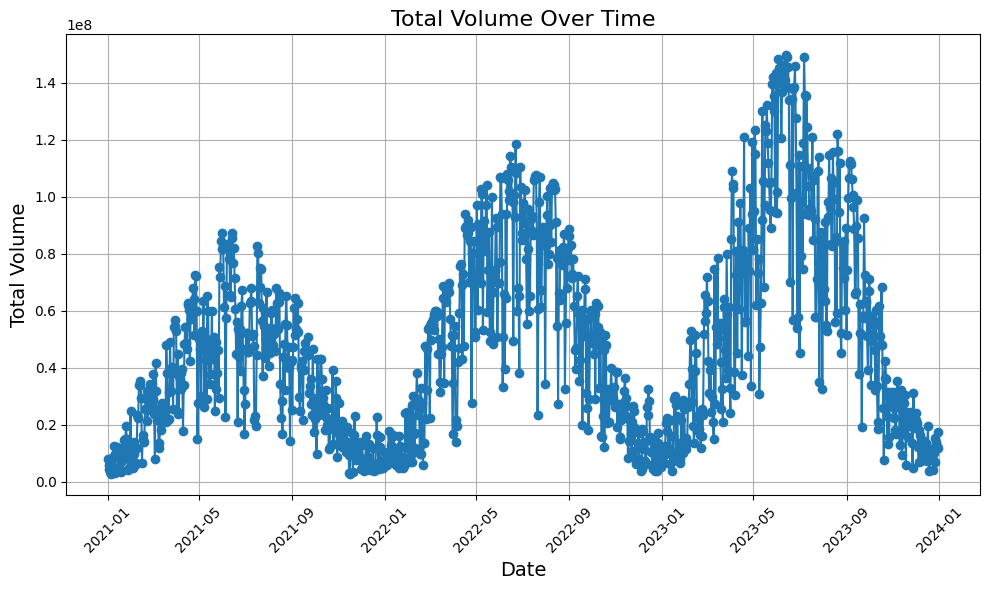

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(df_production_daily['date'], df_production_daily['volume'], marker='o', linestyle='-')

plt.title('Total Volume Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Volume', fontsize=14)
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

By looking at this graph we can see that in general the energy production is higher in the summer months. However this graph is not very useful for details, as there are too many data points in it.

That's why we will aggregate the volume per month, and make a new graph so we can get a better overview.

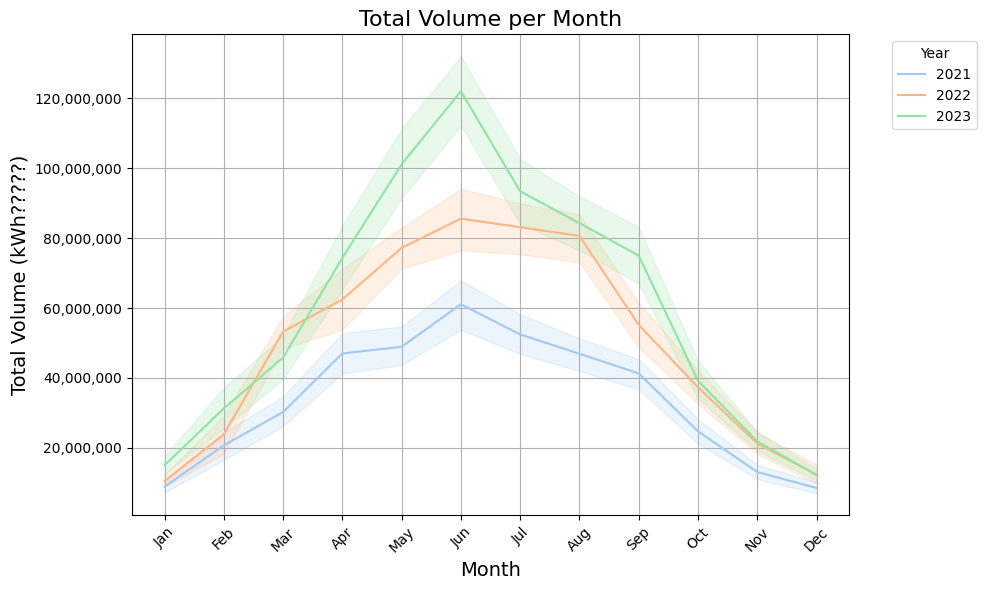

In [94]:
from matplotlib.ticker import FuncFormatter

df_production_daily['Year'] = df_production_daily['date'].dt.year
df_production_daily['Month'] = df_production_daily['date'].dt.month

plt.figure(figsize=(10, 6))
sns.lineplot(x=df_production_daily['Month'], y=df_production_daily['volume'], hue=df_production_daily['Year'], palette='pastel')

plt.title('Total Volume per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Volume (kWh?????)', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

Here we can clearly see the total energy production is higher in the summer months compared to the winter. This seems logical, however we will still compare the data to weather data to see the total amount of sun hours. We can also see there are some fluctuations in the data and that it is not a smooth line. This is because the data is aggregated from hourly data to monthly data, and it is most likely influenced by the weather and the total amount of sun hours.

What is also interesting to see is that the total energy production appears to be overall higher in 2023, this could be because the amount of solar panels in the Netherlands has grown. We will look at this at a later point.

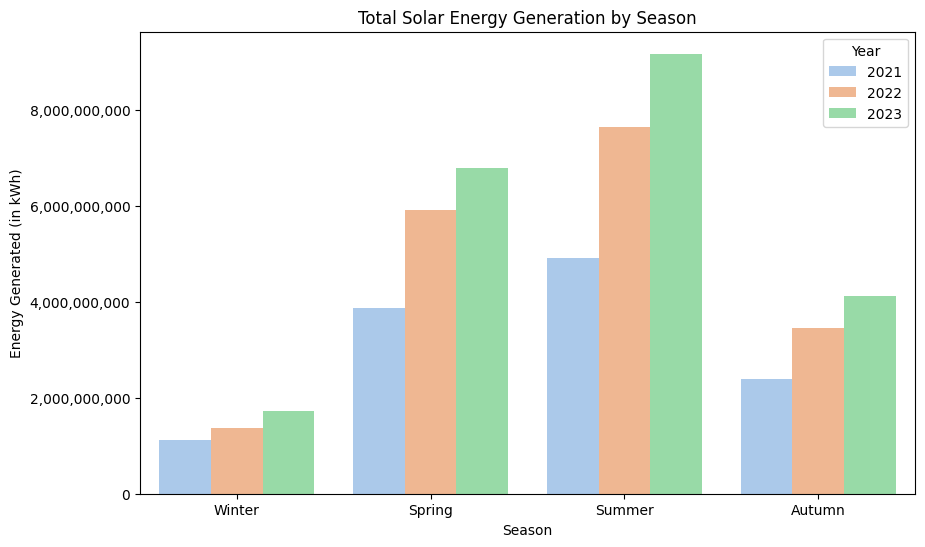

In [101]:
df_season = df.copy()
df_season['Month'] = df['date'].dt.month
df_season['Year'] = df['date'].dt.year

monthly_data = df_season.groupby(['Year', 'Month'])['volume'].sum().reset_index()

season_map = {12: 'Winter', 1: 'Winter', 2: 'Winter', 
              3: 'Spring', 4: 'Spring', 5: 'Spring', 
              6: 'Summer', 7: 'Summer', 8: 'Summer', 
              9: 'Autumn', 10: 'Autumn', 11: 'Autumn'}

season_order = ['Winter', 'Spring', 'Summer', 'Autumn']

df_season['Season'] = df_season['Month'].map(season_map)

seasonal_data = df_season.groupby(['Year', 'Season'])['volume'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='volume', hue='Year', data=seasonal_data, palette='pastel', order=season_order)
plt.title('Total Solar Energy Generation by Season')
plt.ylabel('Energy Generated (in kWh)')

plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


This bar chart confirms that the solar energy production is higher in the summer months

### Weather Data

### Solar Panels
Next we will load the dataset that contains the amount of solar panels in the Netherlands. 

In [112]:
df_solar = pd.read_csv('../data/Other/cleaned_solar_panel_data.csv')
df_solar

,Year,Regio's,Installaties,Opgesteld vermogen omvormers,Opgesteld vermogen van zonnepanelen,Productie van zonnestroom
0,2021,'s-Gravenhage (gemeente),17989.0,NaN,77435.0,NaN
1,2021,'s-Hertogenbosch,13883.0,NaN,103745.0,NaN
2,2021,Aa en Hunze,4392.0,NaN,33382.0,NaN
3,2021,Aalsmeer,3093.0,NaN,34473.0,NaN
4,2021,Aalten,3346.0,NaN,33100.0,NaN
...,...,...,...,...,...,...
1515,2024,Zundert,4548.0,39621.0,45963.0,NaN
1516,2024,Zutphen,8238.0,55888.0,62270.0,NaN
1517,2024,Zwartewaterland,4620.0,37664.0,41483.0,NaN
1518,2024,Zwijndrecht,6638.0,100421.0,105131.0,NaN


In [113]:
df_solar = df_solar[df_solar['Year'] != 2024]
df_solar.tail()

,Year,Regio's,Installaties,Opgesteld vermogen omvormers,Opgesteld vermogen van zonnepanelen,Productie van zonnestroom
1135,2023,Zundert,4361.0,37086.0,42529.0,NaN
1136,2023,Zutphen,7775.0,53811.0,59915.0,NaN
1137,2023,Zwartewaterland,4022.0,35715.0,39306.0,NaN
1138,2023,Zwijndrecht,6457.0,99150.0,103719.0,NaN
1139,2023,Zwolle,24016.0,172119.0,196799.0,NaN


We can see the dataset also contains data from 2024, but since this year is not complete yet the data might not be as accurate. For this reason we will drop the rows where the year is 2024.

In [114]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1140 entries, 0 to 1139
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 1140 non-null   int64  
 1   Regio's                              1140 non-null   object 
 2   Installaties                         1099 non-null   float64
 3   Opgesteld vermogen omvormers         727 non-null    float64
 4   Opgesteld vermogen van zonnepanelen  1099 non-null   float64
 5   Productie van zonnestroom            60 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 62.3+ KB


We can see there are quite a few NaN values in this dataset, especially in the column `Productie van zonnestroom`. This column only has a few rows that actually do contain any data, but this is not the biggest problem since we are already using the solar production dataset for the production. This means we can just drop this column.

The column we are most interested in is `Installaties` as this column contains the amount of solar panels. This also has some NaN values.

In [115]:
unique_regios = df_solar["Regio's"].unique()
unique_regios

array(["'s-Gravenhage (gemeente)", "'s-Hertogenbosch", 'Aa en Hunze',
       'Aalsmeer', 'Aalten', 'Achtkarspelen', 'Alblasserdam',
       'Albrandswaard', 'Alkmaar', 'Almelo', 'Almere',
       'Alphen aan den Rijn', 'Alphen-Chaam', 'Altena', 'Ameland',
       'Amersfoort', 'Amstelveen', 'Amsterdam', 'Apeldoorn', 'Appingedam',
       'Arnhem', 'Assen', 'Asten', 'Baarle-Nassau', 'Baarn',
       'Barendrecht', 'Barneveld', 'Beek (L.)', 'Beekdaelen', 'Beemster',
       'Beesel', 'Berg en Dal', 'Bergeijk', 'Bergen (L.)', 'Bergen (NH.)',
       'Bergen op Zoom', 'Berkelland', 'Bernheze', 'Best', 'Beuningen',
       'Beverwijk', 'Bladel', 'Blaricum', 'Bloemendaal',
       'Bodegraven-Reeuwijk', 'Boekel', 'Borger-Odoorn', 'Borne',
       'Borsele', 'Boxmeer', 'Boxtel', 'Breda', 'Brielle', 'Bronckhorst',
       'Brummen', 'Brunssum', 'Bunnik', 'Bunschoten', 'Buren',
       'Capelle aan den IJssel', 'Castricum', 'Coevorden', 'Cranendonck',
       'Cuijk', 'Culemborg', 'Dalfsen', 'Dantumadiel', 

We can see there are quite a few unique regions in this dataset.

In [116]:
df_regions = df_solar[df_solar["Regio's"].str.contains(r'\(PV\)', case=False) | (df_solar["Regio's"] == "Nederland")].reset_index(drop=True)
df_regions


,Year,Regio's,Installaties,Opgesteld vermogen omvormers,Opgesteld vermogen van zonnepanelen,Productie van zonnestroom
0,2021,Drenthe (PV),76601.0,NaN,897359.0,692.0
1,2021,Flevoland (PV),46201.0,NaN,585708.0,436.0
2,2021,Fryslân (PV),92028.0,NaN,865297.0,690.0
3,2021,Gelderland (PV),231904.0,NaN,1885896.0,1411.0
4,2021,Groningen (PV),77736.0,NaN,1156477.0,901.0
5,2021,Limburg (PV),145009.0,NaN,1176294.0,912.0
6,2021,Nederland,1730285.0,NaN,14822880.0,11304.0
7,2021,Niet in te delen (PV),426.0,NaN,14389.0,12.0
8,2021,Noord-Brabant (PV),276145.0,NaN,2577937.0,1959.0
9,2021,Noord-Holland (PV),218003.0,NaN,1440930.0,1114.0


To confirm the total amount of installaties for Nederland is the same as the sum of the regions we will calculate the sum of the installaties of the regions and compare it to Nederland.

In [ ]:
pv_rows = df_regions[df_regions['Regio\'s'].str.contains(r'\(PV\)')]
nederland_row = df_regions[df_regions['Regio\'s'] == 'Nederland']

pv_yearly_sum = pv_rows.groupby('Year')['Installaties'].sum().reset_index()

nederland_yearly = nederland_row[['Year', 'Installaties']]

comparison = pd.merge(pv_yearly_sum, nederland_yearly, on='Year', suffixes=('_PV', '_Nederland'))

comparison


,Year,Installaties_PV,Installaties_Nederland
0,2021,1730285.0,1730285.0
1,2022,2298859.0,2298859.0
2,2023,2875487.0,2875487.0


The total amount appears to be the same.

# TODO
* correlate to amount of solar panels over years
* correlate to sun hours/weather data